In [9]:
import pandas as pd
from os import walk
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import imgkit
from xvfbwrapper import Xvfb
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('/home/gridsan/arunas/bin/')

In [3]:
sys.path

['/home/gridsan/arunas/broca/mistral/confusion',
 '/state/partition1/llgrid/pkg/anaconda/python-LLM-2023b/lib/python310.zip',
 '/state/partition1/llgrid/pkg/anaconda/python-LLM-2023b/lib/python3.10',
 '/state/partition1/llgrid/pkg/anaconda/python-LLM-2023b/lib/python3.10/lib-dynload',
 '',
 '/home/gridsan/arunas/.local/lib/python3.10/site-packages',
 '/state/partition1/llgrid/pkg/anaconda/python-LLM-2023b/lib/python3.10/site-packages',
 '/home/gridsan/arunas/bin/']

In [4]:
files = []
for (dirpath, dirnames, filenames) in walk("/home/gridsan/arunas/broca/mistral/confusion"):
    for filename in filenames:
        if ('acc' in filename):
            files.append(filename)

In [5]:
files = sorted(files)
files

['mistral-classification-train-test-acc-it-new.csv',
 'mistral-classification-train-test-acc-it-r-1-null_subject-new.csv',
 'mistral-classification-train-test-acc-it-r-2-passive-new.csv',
 'mistral-classification-train-test-acc-it-r-3-subordinate-new.csv',
 'mistral-classification-train-test-acc-it-u-1-negation-new.csv',
 'mistral-classification-train-test-acc-it-u-2-invert-new.csv',
 'mistral-classification-train-test-acc-it-u-3-gender-new.csv',
 'mistral-classification-train-test-acc-jp-r-1-sov-new.csv',
 'mistral-classification-train-test-acc-jp-r-2-passive-new.csv',
 'mistral-classification-train-test-acc-jp-r-3-subordinate-new.csv',
 'mistral-classification-train-test-acc-jp-u-1-negation-new.csv',
 'mistral-classification-train-test-acc-jp-u-2-invert-new.csv',
 'mistral-classification-train-test-acc-jp-u-3-past-tense-new.csv',
 'mistral-classification-train-test-acc-passive-sentence-new.csv',
 'mistral-classification-train-test-acc-sentence-new.csv',
 'mistral-classification-train

In [6]:
columns = sorted(['sentence', 'subordinate-sentence', 'passive-sentence', 'it', 'it-r-1-null_subject', 'it-r-2-passive', 'it-r-3-subordinate', 'it-u-1-negation', 'it-u-2-invert', 'it-u-3-gender', 'jp-r-1-sov', 'jp-r-2-passive', 'jp-r-3-subordinate', 'jp-u-1-negation', 'jp-u-2-invert', 'jp-u-3-past-tense'])
conf = pd.DataFrame(columns=columns)

for f in files:
    m = pd.read_csv(f)
    rowDict = {'index': m['trainType']}
    for idx, row in m.iterrows():
        rowDict[row['testType']] = row['accuracy']
    conf = pd.concat([conf, pd.DataFrame.from_dict(rowDict,)])

conf.index=conf['index']
conf.drop_duplicates(inplace=True)
conf = conf[columns]
        

/state/partition1/slurm_tmp/25169865.0.0/ipykernel_1432788/1603623432.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf = pd.concat([conf, pd.DataFrame.from_dict(rowDict,)])


In [7]:
conf

,it,it-r-1-null_subject,it-r-2-passive,it-r-3-subordinate,it-u-1-negation,it-u-2-invert,it-u-3-gender,jp-r-1-sov,jp-r-2-passive,jp-r-3-subordinate,jp-u-1-negation,jp-u-2-invert,jp-u-3-past-tense,passive-sentence,sentence,subordinate-sentence
index,,,,,,,,,,,,,,,,
it,0.66,0.49,0.58,0.60,0.50,0.52,0.67,0.47,0.51,0.52,0.50,0.49,0.46,0.82,0.76,0.81
it-r-1-null_subject,0.57,0.58,0.62,0.61,0.52,0.50,0.64,0.42,0.53,0.47,0.47,0.50,0.45,0.85,0.78,0.78
it-r-2-passive,0.64,0.45,0.79,0.65,0.54,0.52,0.71,0.49,0.49,0.51,0.51,0.45,0.49,0.78,0.82,0.89
it-r-3-subordinate,0.73,0.47,0.61,0.71,0.55,0.49,0.73,0.52,0.50,0.50,0.47,0.49,0.50,0.79,0.91,0.75
it-u-1-negation,0.67,0.50,0.59,0.62,0.69,0.49,0.63,0.51,0.49,0.50,0.52,0.49,0.45,0.80,0.78,0.82
it-u-2-invert,0.49,0.49,0.56,0.55,0.52,0.58,0.53,0.50,0.47,0.48,0.49,0.50,0.46,0.80,0.76,0.80
it-u-3-gender,0.64,0.46,0.65,0.63,0.51,0.50,0.67,0.49,0.45,0.50,0.49,0.52,0.50,0.79,0.75,0.81
jp-r-1-sov,0.56,0.44,0.67,0.60,0.55,0.51,0.56,0.73,0.50,0.55,0.53,0.53,0.53,0.80,0.82,0.75
jp-r-2-passive,0.58,0.45,0.62,0.57,0.49,0.51,0.59,0.55,0.74,0.56,0.52,0.56,0.55,0.72,0.71,0.71


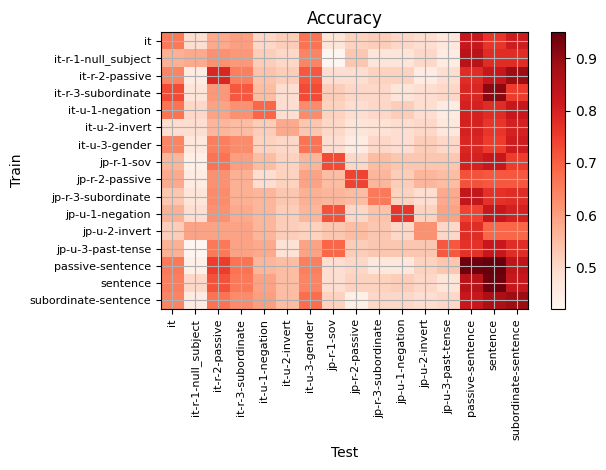

In [16]:
plt.imshow(conf, cmap='Reds', aspect='auto', interpolation='nearest')
plt.xticks(range(len(conf.columns)), conf.columns)
plt.yticks(range(len(conf.index)), conf.index)
plt.xticks(fontsize=8, rotation=90)  # Set x-axis tick label font size
plt.yticks(fontsize=8)  # Set y-axis tick label font size
plt.grid(True)
plt.title('Accuracy')
plt.xlabel('Test')
plt.ylabel('Train')
plt.colorbar()
plt.tight_layout()
plt.savefig('/home/gridsan/arunas/broca/mistral/confusion/lang-confusion-matrix.png')
plt.show()